<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Network Science SS 2020</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Python Computer Exercise 3</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Communities & Centralities</h1>
<hr>

**Website:** http://www.thp.uni-koeln.de/witthaut/group.html


**Submission:** Please upload your solutions to Ilias.

## Communities & Centralities
If the structure of a network is known, i.e., if we know its topology, how many nodes there are and how they are connected, it is possible to calculate a variety of quantities or measures that describe certain concepts of the network topology. One of those concepts are *network centralities* which assign each node (or edge) in the network a certain value according to some their "importance". The most straightforward centrality is the degree centrality which assigns each node a value according to their degree.

There are several other centralities but in this exercise we focus on the*edge betweenes centrality*, which will allow us to detect communities in a network. 

A*community* is a set of nodes in a network that can be grouped into a set of preferential attachments to other nodes in the network. Maybe one of the most famous example where we can study communities is [*Zachary's Karate Club*](), which is discussed in delay in this paper by [Girvan & Newman](https://arxiv.org/pdf/cond-mat/0112110.pdf), whose algorithm we will try to implement here.

## 1. Girvan-Newman algorithm
The Girvan-Newman algorithm is a community detection algorithm which makes use of the betweeness centrality.

The betweeness centrality $g(v)$ of node $v$ is defined via the number of all shortest paths $\sigma_{st}(v)$ from node $s$ to node $t$ through node $v$ divided by the number of all shortest paths in the graph $\sigma_{st}$ from $s$ to $t$.
$$
g(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$
It thus describes the potential of passersby of node $v$ of a random walker in a network. This property can be useful to determine a profitable location for a new shop in a city network for instance. In this exercise we will use it different, however. We can almost identically define the betweeness centrality $g(e)$ for edge $e$ as
$$
g(e) = \sum_{n \neq e \neq m} \frac{\sigma_{nm}(e)}{\sigma_{nm}}.
$$
If a network contains communities which are only connected by a few edges, then all shortest paths between different communities must go along one of these few edges. Thus, the edges which connect two communities will have a high edge betweenness. By succesively removing edges with the highest edge betweenes and checking if the network is still globally connected we can thus detect communities. This is known as the *Girvan-Newman algorithm*.

### Tasks
Let us try and design the Girvan-Newman algorithm to detect communities:
1. Design a method to identify the edge with the highest edge betweenness. You can use `networkx` `edge_betweenness`
2. Remove this edge and iterate 1.-2.
3. Design a stop condition that stops when you obtain two disconnected components.
4. Test your algorithm on the famous Zachary's Katare Club. You can get the network with `G = nx.karate_club_graph()` (you can find more info [here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.social.karate_club_graph.html))

In [22]:
import networkx as nx

def GirvanNewman(G):
    init = nx.number_connected_components(G)
    new = init
    while new <= init:
        betweenness = nx.edge_betweenness_centrality(G)
        edge = max(betweenness, key=betweenness.get)
        G.remove_edge(*edge)
        comp = tuple(nx.connected_components(G))
        new = len(comp)
    return G

In [23]:
# Here is a small plotter function, so you can see which edges were removed and the 2 different components
# Just insert the original network G and your new separated network
def plot_graph_difference(G, separated_G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos = pos, with_labels=True)
    nx.draw_networkx_edges(G, pos= pos, edgelist = list(nx.difference(G, separated_G).edges()),
                           width=8, alpha=0.5, edge_color='r')
    list(nx.difference(G, separated_G).nodes())
    nx.draw_networkx_nodes(G,pos = pos, nodelist =  list(next(nx.connected_components(separated_G))),
                           node_color='g')

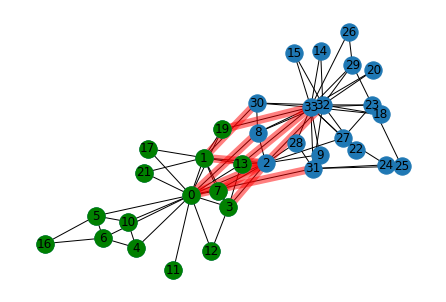

In [25]:
G = nx.karate_club_graph()
plot_graph_difference(G, separated_G)